In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14


res = pd.read_csv('../data/master_table.tsv', sep='\t', index_col=0)
res = res[res.chromosome != 'MtDNA']
res = res[(res.padj58 < 0.05) | (res.padj50 < 0.05)]

df = pd.read_csv('/Users/davidangeles/Documents/matrix.csv')

In [2]:
res

,baseMean50,log2FoldChange50,lfcSE50,stat50,pvalue50,padj50,genename50,logq50,baseMean58,log2FoldChange58,...,Size,SignAt50,SignAt58,Sign,Significance,Ratio,Above,MinCountsDetected,logBM50,logBM58
WBGene00000005,200.963873,0.345158,0.126934,2.719196,6.544077e-03,4.898799e-02,aat-4,1.309910,130.179697,0.337502,...,3184.0,Positive,Positive,Same,DE at 50hrs,0.977818,False,3.992007,2.303118,2.114543
WBGene00000022,1185.783680,0.128910,0.052335,2.463184,1.377093e-02,8.695358e-02,abt-4,1.060713,1236.111106,0.212349,...,6951.0,Positive,Positive,Same,DE at 58hrs,1.647257,False,38.952224,3.074005,3.092058
WBGene00000023,458.394033,-0.342206,0.085007,-4.025632,5.682261e-05,9.494920e-04,abt-5,3.022509,41.508962,-0.471992,...,7473.0,Negative,Negative,Same,DE at 50hrs,1.379264,False,1.147995,2.661239,1.618142
WBGene00000036,993.454735,-0.173991,0.057746,-3.013025,2.586580e-03,2.417553e-02,ace-2,1.616624,463.569963,-0.208900,...,5586.0,Negative,Negative,Same,DE at 50hrs,1.200636,False,14.497055,2.997148,2.666115
WBGene00000040,6449.175001,0.188048,0.026630,7.061532,1.646766e-12,1.035045e-10,aco-1,9.985041,5292.097257,0.020929,...,3694.0,Positive,Positive,Same,DE at 50hrs,0.111294,False,180.938878,3.809504,3.723628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBGene00219376,141.127170,-0.589831,0.151007,-3.905987,9.384138e-05,1.481353e-03,C28G1.10,2.829341,60.716213,-0.758151,...,1360.0,Negative,Negative,Same,DE at 58hrs,1.285371,False,1.481284,2.149611,1.783305
WBGene00219609,293.211196,0.435240,0.112705,3.861765,1.125709e-04,1.721480e-03,linc-7,2.764098,241.798204,0.027715,...,NaN,Positive,Positive,Same,DE at 50hrs,0.063677,False,8.873748,2.467181,2.383453
WBGene00255598,142.633255,-0.537167,0.148125,-3.626453,2.873408e-04,3.882785e-03,BE0003N10.6,2.410857,37.410345,-0.202806,...,3798.0,Negative,Negative,Same,DE at 50hrs,0.377547,False,1.056413,2.154221,1.572992
WBGene00284847,160.744863,-0.107888,0.139543,-0.773153,4.394317e-01,7.194338e-01,F54D8.10,0.143009,103.759670,-0.707575,...,331.0,Negative,Negative,Same,DE at 58hrs,6.558427,False,2.496922,2.206137,2.016029


In [3]:
res50 = pd.read_csv('../../MalePheromoneRNAseq/data/diff_exp/DE_N250.csv', index_col=0)

In [4]:
new = res50.join(res, rsuffix='_old')

Text(0, 0.5, 'New 50 log2FC')

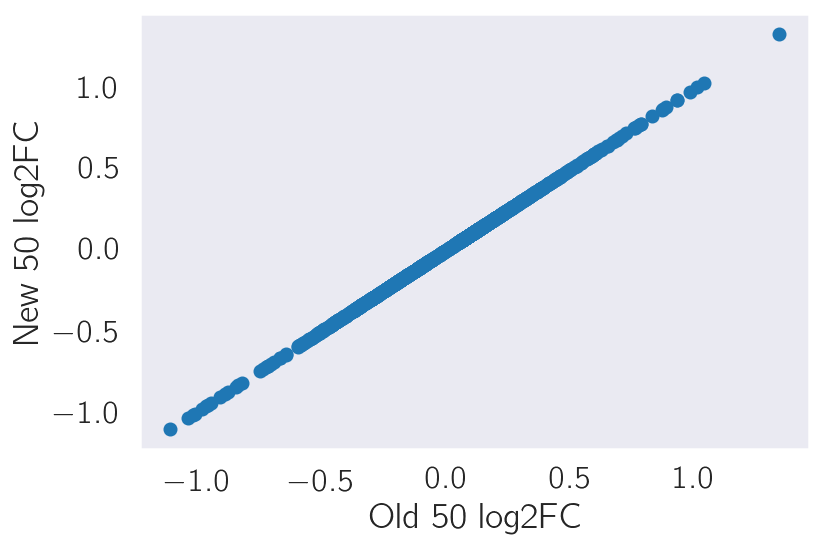

In [5]:
plt.plot(new.log2FoldChange50, new.log2FoldChange, 'o')
plt.xlabel('Old 50 log2FC')
plt.ylabel('New 50 log2FC')

Text(0, 0.5, 'New 50 log2FC')

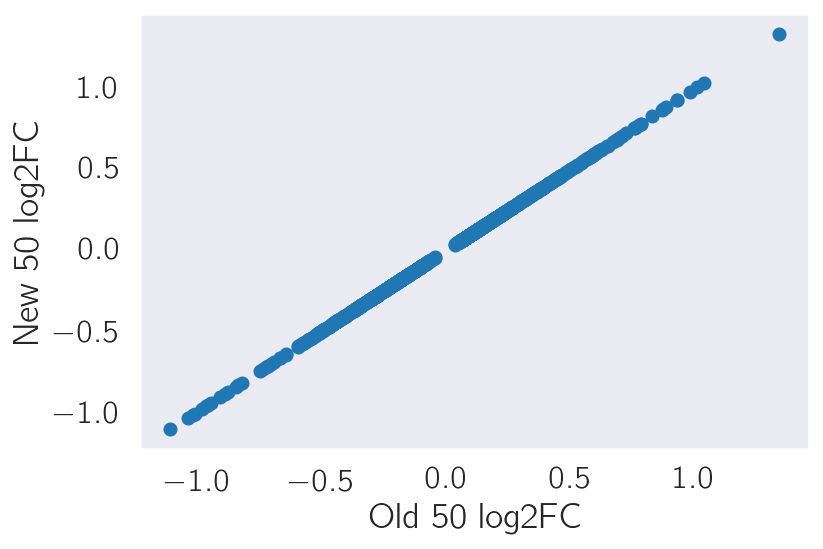

In [6]:
plt.plot(new[new.padj < 0.05].log2FoldChange50, new[new.padj < 0.05].log2FoldChange, 'o')
plt.xlabel('Old 50 log2FC')
plt.ylabel('New 50 log2FC')

In [7]:
res58 = pd.read_csv('../../MalePheromoneRNAseq/data/diff_exp/DE_N258.csv', index_col=0)

Text(0, 0.5, 'New 58 log2FC')

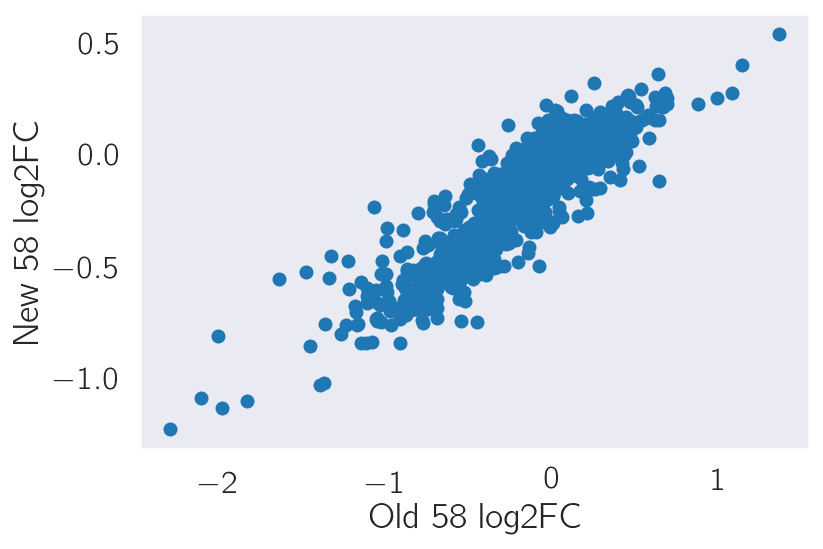

In [8]:
new = res58.join(res, rsuffix='_old')
plt.plot(new.log2FoldChange58, new.log2FoldChange, 'o')
plt.xlabel('Old 58 log2FC')
plt.ylabel('New 58 log2FC')

Text(0, 0.5, 'New 58 log2FC')

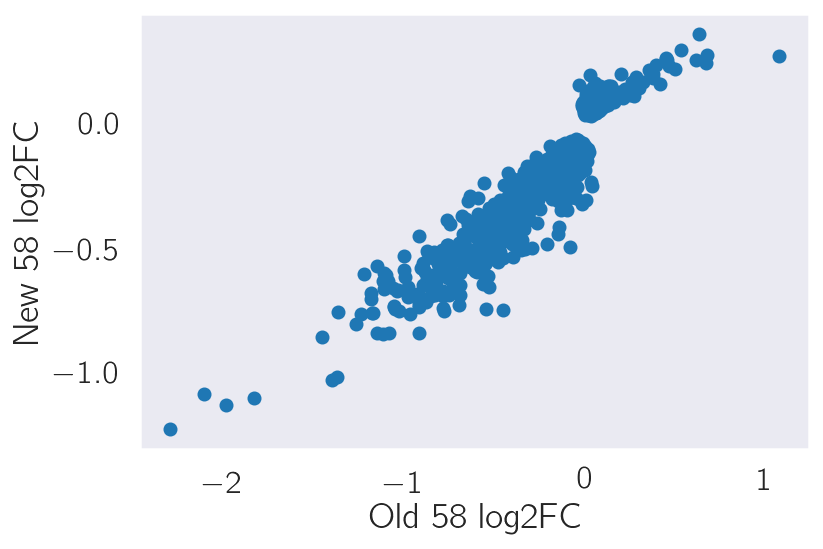

In [9]:
new = res58.join(res, rsuffix='_old')
plt.plot(new[new.padj < 0.05].log2FoldChange58, new[new.padj < 0.05].log2FoldChange, 'o')
plt.xlabel('Old 58 log2FC')
plt.ylabel('New 58 log2FC')

In [ ]:
res